In [171]:
import pandas as pd

## EXPLORING DATA

In [252]:
df = pd.read_csv("../data/guatedata.csv")
df.head(10)

,vedadc_n,vantig_n,vnline_n,vgamma_c,veaseg_c,vctcpl_n,vccdeu_n,vccdeu_n.1,ttkbco_n,vtarge_c
0,60.0,NaN,1,PREMIUM PLUS,n,45,1,1,2439779,0
1,66.0,NaN,1,ALTA,n,71,8,8,0,0
2,NaN,141.0,1,PREMIUM,n,73,25,25,0,0
3,116.0,NaN,2,NaN,n,7,0,0,0,0
4,50.0,NaN,3,ALTA,n,42,7,7,1969990,0
5,54.0,NaN,2,PREMIUM PLUS,n,27,0,0,0,0
6,62.0,NaN,4,NaN,n,40,8,8,0,0
7,50.0,66.0,2,PRIMIUM PLUS,s,38,11,11,1653464,0
8,60.0,NaN,2,PREMIUM,n,24,2,2,0,0
9,60.0,NaN,2,PREMIUM,n,24,2,2,0,0


In [173]:
df.info()       #TRANSFORMAR DE FLOAT A INT LAS VARIABLES vedadc_n y vantig_n, PUESTO QUE SE REFIEREN A LA EDAD Y MESES DE ANTIGUEDAD

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 926 entries, 0 to 925
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   vedadc_n    778 non-null    float64
 1   vantig_n    496 non-null    float64
 2   vnline_n    926 non-null    int64  
 3   vgamma_c    734 non-null    object 
 4   veaseg_c    926 non-null    object 
 5   vctcpl_n    926 non-null    int64  
 6   vccdeu_n    926 non-null    int64  
 7   vccdeu_n.1  926 non-null    int64  
 8   ttkbco_n    926 non-null    int64  
 9   vtarge_c    926 non-null    int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 72.5+ KB


In [174]:
df.describe()

,vedadc_n,vantig_n,vnline_n,vctcpl_n,vccdeu_n,vccdeu_n.1,ttkbco_n,vtarge_c
count,778.000000,496.000000,926.000000,926.000000,926.000000,926.000000,9.260000e+02,926.000000
mean,53.474293,101.177419,1.958963,26.120950,6.304536,6.304536,1.250424e+06,0.278618
std,24.626632,44.257155,1.384251,25.315148,9.335670,9.335670,2.635760e+06,0.448561
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,40.000000,74.000000,1.000000,9.000000,0.000000,0.000000,0.000000e+00,0.000000
50%,53.000000,110.000000,1.000000,19.000000,2.000000,2.000000,0.000000e+00,0.000000
75%,63.000000,134.000000,2.000000,35.000000,8.000000,8.000000,1.107301e+06,1.000000
max,117.000000,174.000000,7.000000,232.000000,54.000000,54.000000,1.834643e+07,1.000000


In [175]:
print(df['vgamma_c'].unique())
print(df['veaseg_c'].unique())              #SE TENDRA QUE TRANSFORMAR EN UN NUEVO FORMATO

['PREMIUM PLUS' 'ALTA' 'PREMIUM' nan 'PRIMIUM PLUS' 'BAJA' 'MEDIA'
 'PREMIUN PLUS' 'ALTAa' 'MEDIIA']
['n' 's' 'no']


In [176]:
df.isna().sum()                 #BASTANTES NULL VALUES EN DIFERENTES CARACTERSTICAS

vedadc_n      148
vantig_n      430
vnline_n        0
vgamma_c      192
veaseg_c        0
vctcpl_n        0
vccdeu_n        0
vccdeu_n.1      0
ttkbco_n        0
vtarge_c        0
dtype: int64

In [177]:
df['vedadc_n'].unique()             #EXISTE PERSONAS CON 0 AÑOS Y MENORES DE EDAD, ESO SE TENDRA QUE FILTRAR

array([ 60.,  66.,  nan, 116.,  50.,  54.,  62.,  80.,  63.,  39.,  59.,
        41.,  64.,  91.,  33.,  55.,  34.,  74.,  48.,  36.,  67.,  38.,
        71.,  42.,  45.,  53.,  12.,  13.,  51.,  22.,  69.,  65.,  32.,
       117.,  43.,  56.,  72.,  49.,  46.,  11.,  57.,  47.,  52.,  44.,
        14.,  30.,  40.,  61.,  17.,  70.,  37.,  35.,  29.,  19.,  10.,
        21.,   5.,  58.,  77.,  83.,  28.,  18.,  76.,   8.,  75.,  82.,
        79.,  86.,   9.,  25.,  68.,  78.,  73.,  92.,  90.,  85.,   7.,
        26.,  15.,  81.,   0.,  16.,  24.,  31.,  20.,  23.,  27.,   3.])

In [178]:
df[df['vedadc_n']>100]['vedadc_n'].value_counts()               #VALORES ANOMALOS EN LA EDAD, ESTOS SON CONSIDERADOS OUTLIERS Y SE CAMBIARAN

117.0    33
116.0    24
Name: vedadc_n, dtype: int64

In [179]:
print(f"Cantidad: {len(df[df['vedadc_n']<18])}\n")
print(df[df['vedadc_n']<18]['vedadc_n'].value_counts())                #SE DEBE ELIMINAR ESTOS VALORES (APROX 6% DE LA DATA)

Cantidad: 57

17.0    14
12.0     6
9.0      6
13.0     5
11.0     5
10.0     5
0.0      5
14.0     4
15.0     2
5.0      1
8.0      1
7.0      1
16.0     1
3.0      1
Name: vedadc_n, dtype: int64


In [180]:
df['vantig_n'].unique()                                         #EL VALOR NAN COMO UNICO TIPO DE ERROR

array([ nan, 141.,  66.,  80.,  29., 122., 153.,  73., 135., 148., 134.,
       160., 109.,  89.,  79.,  58., 150.,  59., 145., 167., 168., 131.,
       137., 149.,   6.,  88., 143., 133., 144.,  71.,  82.,  90., 108.,
       142.,  36.,  84.,  75.,  78.,  86., 138., 129.,   5., 164., 147.,
       151., 110.,  92.,  76.,  96.,  47., 166., 155., 132., 111., 152.,
        74., 171., 146., 114.,  99.,  98.,   1.,  12., 156., 121.,  87.,
       162.,  70., 105., 163., 158., 107., 157.,  91., 140.,  43.,  85.,
        69., 113., 120., 115., 130.,  94.,  83., 139., 119., 172.,   9.,
       154.,  15.,   7.,  21.,  81., 128.,  16.,  51., 116.,  23., 126.,
        24., 159.,  27.,  60., 124.,   2.,  19.,  39.,   4.,  56.,  62.,
       136.,  28.,  26., 104.,  33.,  93.,  13.,  53.,  64.,  45.,  97.,
        50.,  18.,  38.,  65.,  63., 117., 100.,  77.,  11., 174.,  54.,
        67., 125.,  61.,  30., 123., 102.,  46.,  34.,   8.,  10.,  40.,
       127.,  72.,  41.,  17.,  57., 112.,  68.,  1

In [181]:
df['vgamma_c'].unique()                             #VARIAS PALABRAS QUE SIGNIFICAN LO MISMO, SE TENDRA QUE ARREGLAR

array(['PREMIUM PLUS', 'ALTA', 'PREMIUM', nan, 'PRIMIUM PLUS', 'BAJA',
       'MEDIA', 'PREMIUN PLUS', 'ALTAa', 'MEDIIA'], dtype=object)

In [182]:
df.duplicated().sum()                       #SE ELIMINARAN LOS DUPLICADOS

24

In [183]:
df[(df.isna().sum(1)>2)]               #LAS FILAS CON 3 NAN VALUES SERAN ELIMINADAS

,vedadc_n,vantig_n,vnline_n,vgamma_c,veaseg_c,vctcpl_n,vccdeu_n,vccdeu_n.1,ttkbco_n,vtarge_c
24,NaN,NaN,6,NaN,n,18,2,2,0,0
256,NaN,NaN,1,NaN,n,12,2,2,841417,0
269,NaN,NaN,1,NaN,n,25,5,5,3793228,0
290,NaN,NaN,4,NaN,n,8,0,0,186228,0
300,NaN,NaN,2,NaN,n,37,10,10,1650043,0
320,NaN,NaN,1,NaN,n,15,1,1,0,0
324,NaN,NaN,3,NaN,n,45,7,7,0,0
335,NaN,NaN,1,NaN,n,0,0,0,0,0
364,NaN,NaN,1,NaN,n,68,7,7,0,0
373,NaN,NaN,1,NaN,n,9,1,1,0,0


## DATA CLEANING

In [184]:
df_copy = df.copy()

In [185]:
#ELIMINACIONDE DATOS

df_copy_1 = df_copy[~(df_copy.isna().sum(1)>2)]
df_copy_1 = df_copy_1[df_copy_1['vedadc_n']>=18]
df_copy_1.drop_duplicates(inplace=True)
df_copy_1.drop(columns=['vccdeu_n.1'], inplace=True)

In [186]:
#CAMBIO DE OUTLIERS EN LA EDAD DE 116 Y 117 AÑOS

median_age = df_copy_1[df_copy_1['vedadc_n']<100]['vedadc_n'].median()
df_copy_1['vedadc_n'] = df_copy_1['vedadc_n'].replace([116.0, 117.0], median_age)

df_copy_1['vedadc_n'].unique()

array([60., 66., 53., 50., 54., 62., 80., 63., 39., 59., 41., 64., 91.,
       33., 55., 34., 74., 48., 36., 67., 38., 71., 42., 45., 51., 22.,
       69., 65., 32., 43., 56., 72., 49., 46., 57., 47., 52., 44., 30.,
       40., 61., 70., 37., 35., 29., 19., 21., 58., 77., 83., 28., 18.,
       76., 75., 82., 79., 86., 25., 68., 78., 73., 92., 90., 85., 26.,
       81., 24., 31., 20., 23., 27.])

In [187]:
#CAMBIO DE VALORES DE LA COLUMNA VEASEG

df_copy_1['veaseg_c'] = df_copy_1['veaseg_c'].replace(['n','s'],[0,1])

df_copy_1.head()

,vedadc_n,vantig_n,vnline_n,vgamma_c,veaseg_c,vctcpl_n,vccdeu_n,ttkbco_n,vtarge_c
0,60.0,NaN,1,PREMIUM PLUS,0,45,1,2439779,0
1,66.0,NaN,1,ALTA,0,71,8,0,0
3,53.0,NaN,2,NaN,0,7,0,0,0
4,50.0,NaN,3,ALTA,0,42,7,1969990,0
5,54.0,NaN,2,PREMIUM PLUS,0,27,0,0,0


In [188]:
#CAMBIANDO LOS VALORES DE VGAMMA_C

df_copy_1['vgamma_c'] = df_copy_1['vgamma_c'].replace(['PREMIUN PLUS', 'PRIMIUM PLUS'], 'PREMIUM PLUS')
df_copy_1['vgamma_c'] = df_copy_1['vgamma_c'].replace(['ALTAa'], 'ALTA')

df_copy_1['vgamma_c'].unique()

array(['PREMIUM PLUS', 'ALTA', nan, 'PREMIUM', 'MEDIA', 'BAJA'],
      dtype=object)

In [249]:
df_copy_1.head(10)

,vedadc_n,vantig_n,vnline_n,vgamma_c,veaseg_c,vctcpl_n,vccdeu_n,ttkbco_n,vtarge_c
0,60.0,NaN,1,PREMIUM PLUS,0,45,1,2439779,0
1,66.0,NaN,1,ALTA,0,71,8,0,0
3,53.0,NaN,2,NaN,0,7,0,0,0
4,50.0,NaN,3,ALTA,0,42,7,1969990,0
5,54.0,NaN,2,PREMIUM PLUS,0,27,0,0,0
6,62.0,NaN,4,NaN,0,40,8,0,0
7,50.0,66.0,2,PREMIUM PLUS,1,38,11,1653464,0
8,60.0,NaN,2,PREMIUM,0,24,2,0,0
13,80.0,NaN,4,PREMIUM PLUS,0,6,0,95899,0
14,63.0,NaN,6,PREMIUM PLUS,0,14,0,0,0


## EDA

In [190]:
import seaborn as sns
import matplotlib.pyplot as plt

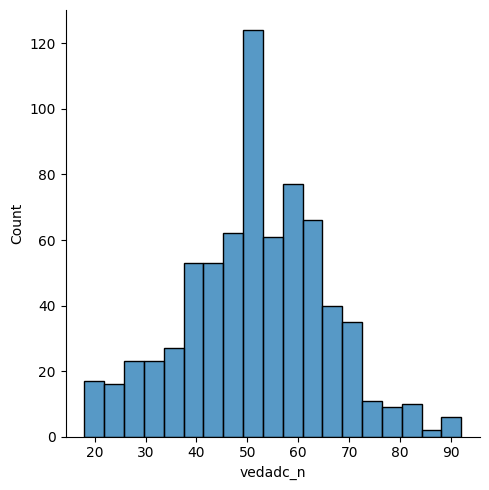

In [191]:
sns.displot(data=df_copy_1, x='vedadc_n')
plt.show()

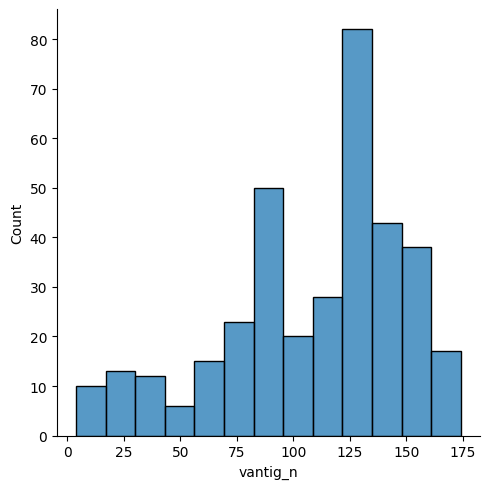

In [192]:
sns.displot(data=df_copy_1, x='vantig_n')
plt.show()

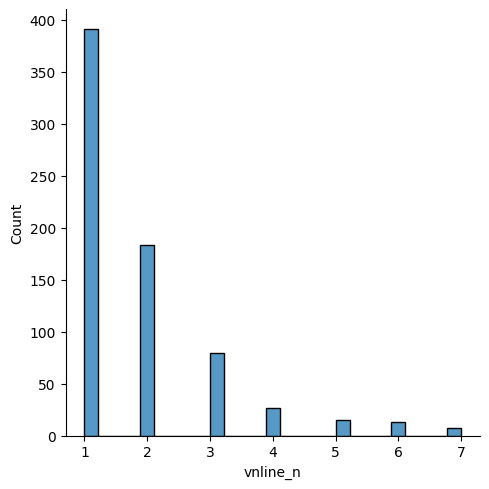

In [193]:
sns.displot(data=df_copy_1, x='vnline_n')
plt.show()

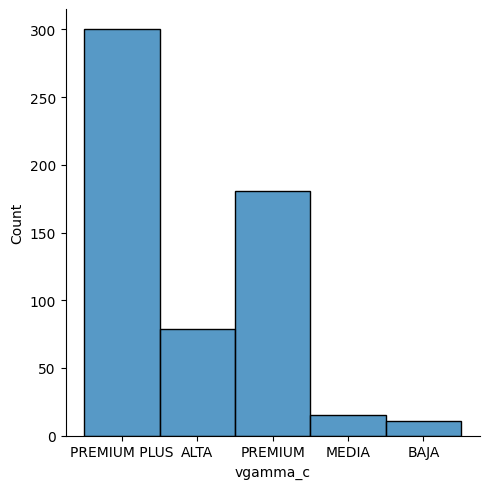

In [194]:
sns.displot(data=df_copy_1, x='vgamma_c')
plt.show()

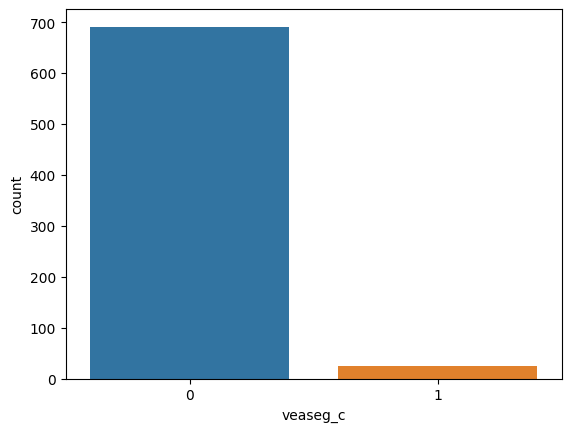

In [195]:
sns.countplot(data=df_copy_1, x='veaseg_c')
plt.show()

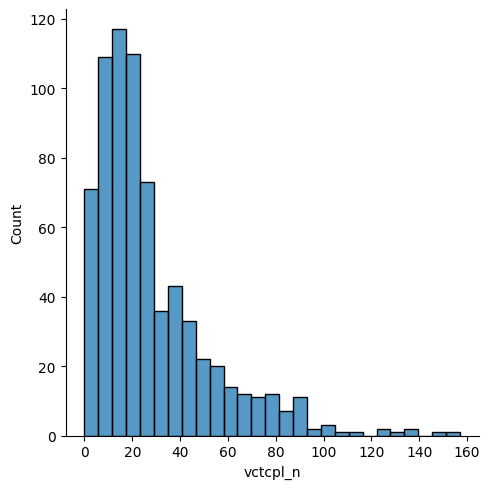

In [196]:
sns.displot(data=df_copy_1, x='vctcpl_n')
plt.show()

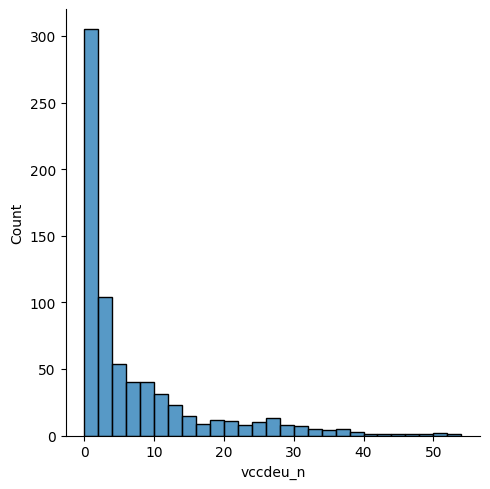

In [197]:
sns.displot(data=df_copy_1, x='vccdeu_n')
plt.show()

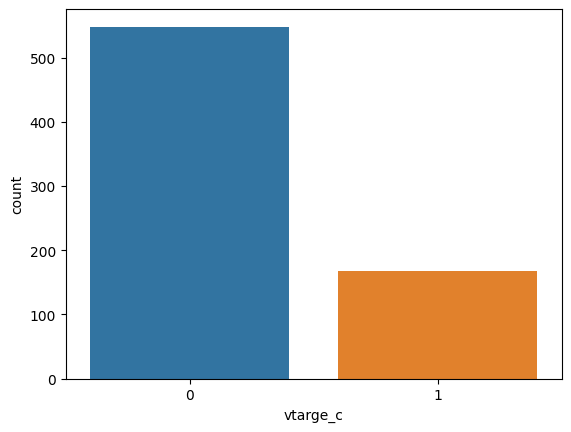

In [198]:
sns.countplot(data=df_copy_1, x='vtarge_c')
plt.show()

## FEATURE TRANSFORMATION

In [206]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.pipeline import Pipeline, make_pipeline

In [207]:
x = df_copy_1.drop(columns=["vtarge_c"])
y = df_copy_1['vtarge_c']

In [208]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=20)

In [209]:
step1 = ColumnTransformer([
        ('step1', make_pipeline(
            SimpleImputer(strategy='most_frequent', missing_values=np.nan),
            OneHotEncoder()
        ), ["vgamma_c"]),
        ('step2',SimpleImputer(strategy='median', missing_values=np.nan),["vantig_n"])
    ], remainder='passthrough')

#dataset = pd.DataFrame(step1.fit_transform(x_train), columns=step1.get_feature_names_out())
#dataset.head()

## ML MODELS

### LOGISTIC REGRESSION

In [237]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [238]:
lr = LogisticRegression()
pipe_lr = Pipeline([
    ("step1", step1),
    ("model", lr)
])

pipe_lr.fit(x_train, y_train)
pipe_lr_predict = pipe_lr.predict(x_test)

print(f"Acc: {round(accuracy_score(y_test, pipe_lr_predict)*100,2)} %")

Acc: 77.62 %


In [239]:
print(classification_report(y_test, pipe_lr_predict))

              precision    recall  f1-score   support

           0       0.78      1.00      0.87       111
           1       0.00      0.00      0.00        32

    accuracy                           0.78       143
   macro avg       0.39      0.50      0.44       143
weighted avg       0.60      0.78      0.68       143



d:\AnalisisDatos\Portfolio\Churn-Guatemala\env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\AnalisisDatos\Portfolio\Churn-Guatemala\env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\AnalisisDatos\Portfolio\Churn-Guatemala\env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

In [240]:
print(confusion_matrix(y_test, pipe_lr_predict))

[[111   0]
 [ 32   0]]


### RANDOM FOREST

In [241]:
from sklearn.ensemble import RandomForestClassifier

In [242]:
rf = RandomForestClassifier()

pipe_rf = Pipeline([
    ("step1", step1),
    ("model", rf)
])

pipe_rf.fit(x_train, y_train)
pipe_rf_predict = pipe_rf.predict(x_test)

print(f"Acc: {round(accuracy_score(y_test, pipe_rf_predict)*100,2)} %")

Acc: 88.81 %


In [243]:
print(classification_report(y_test, pipe_rf_predict))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       111
           1       0.83      0.62      0.71        32

    accuracy                           0.89       143
   macro avg       0.87      0.79      0.82       143
weighted avg       0.88      0.89      0.88       143



In [244]:
print(confusion_matrix(y_test, pipe_rf_predict))

[[107   4]
 [ 12  20]]


### XGBOOST

In [245]:
from xgboost import XGBClassifier

In [246]:
xg = XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, objective='binary:logistic')

pipe_xg = Pipeline([
    ("step1", step1),
    ("model", xg)
])

pipe_xg.fit(x_train, y_train)
pipe_xg_predict = pipe_xg.predict(x_test)

print(f"Acc: {round(accuracy_score(y_test, pipe_xg_predict)*100,2)} %")

Acc: 88.81 %


In [247]:
print(classification_report(y_test, pipe_xg_predict))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       111
           1       0.79      0.69      0.73        32

    accuracy                           0.89       143
   macro avg       0.85      0.82      0.83       143
weighted avg       0.88      0.89      0.89       143



In [248]:
print(confusion_matrix(y_test, pipe_xg_predict))

[[105   6]
 [ 10  22]]


### CONCLUSION

- In a few words, each one ML model presents similar good metrics in "0" classification, on the other hand, metrics in "1" classification are not acceptable.
- My hypothesis about garbage metrics is the unbalanced samples values on target feature, 0 classification's metrics has better results because it has more samples and on the other hand, 1 classification's metrics has worst results because it has less samples

## OVERSAMPLING

In [222]:
from imblearn.combine import SMOTEENN
from imblearn.pipeline import Pipeline as imbpipeline

In [223]:
sm = SMOTEENN(random_state=42)

### LOGISTIC REGRESSION

In [231]:
lr_res = LogisticRegression()
pipe_lr_res = imbpipeline([
    ("step1", step1),
    ("step2", sm),
    ("model", lr_res)
])

pipe_lr_res.fit(x_train, y_train)
pipe_lr_res_predict = pipe_lr_res.predict(x_test)

print(f"Acc: {round(accuracy_score(y_test, pipe_lr_res_predict)*100,2)} %")

Acc: 84.62 %


d:\AnalisisDatos\Portfolio\Churn-Guatemala\env\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [232]:
print(classification_report(y_test, pipe_lr_res_predict))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90       111
           1       0.61      0.84      0.71        32

    accuracy                           0.85       143
   macro avg       0.78      0.85      0.80       143
weighted avg       0.87      0.85      0.85       143



### RANDOM FOREST

In [233]:
rf_res = RandomForestClassifier()

pipe_rf_res = imbpipeline([
    ("step1", step1),
    ('step2', sm),
    ("model", rf_res)
])

pipe_rf_res.fit(x_train, y_train)
pipe_rf_res_predict = pipe_rf_res.predict(x_test)

print(f"Acc: {round(accuracy_score(y_test, pipe_rf_res_predict)*100,2)} %")

Acc: 86.01 %


In [234]:
print(classification_report(y_test, pipe_rf_res_predict))

              precision    recall  f1-score   support

           0       0.95      0.86      0.91       111
           1       0.64      0.84      0.73        32

    accuracy                           0.86       143
   macro avg       0.80      0.85      0.82       143
weighted avg       0.88      0.86      0.87       143



### XGBOOST

In [235]:
xg_res = XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, objective='binary:logistic')

pipe_xg_res = imbpipeline([
    ("step1", step1),
    ('step2', sm),
    ("model", xg_res)
])

pipe_xg_res.fit(x_train, y_train)
pipe_xg_res_predict = pipe_xg_res.predict(x_test)

print(f"Acc: {round(accuracy_score(y_test, pipe_xg_res_predict)*100,2)} %")

Acc: 88.11 %


In [236]:
print(classification_report(y_test, pipe_xg_predict))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92       111
           1       0.68      0.88      0.77        32

    accuracy                           0.88       143
   macro avg       0.82      0.88      0.84       143
weighted avg       0.90      0.88      0.89       143



### CONCLUSION

- Even if we use over-sampling, metrics results seem equals and thus, we will choose XGBOOST without over-sampling technique as ML model
- For a better results, we need more data with target values as "1"

## EXPORTATION MODEL

In [230]:
import pickle

In [253]:
#TESTING ML MODEL BEFORE EXPORTATION

df_temp = pd.DataFrame({
    "vedadc_n": 50.0,
    "vantig_n": 66.0,
    "vnline_n": 2,
    "vgamma_c": "PREMIUM PLUS",
    "veaseg_c": 1,
    "vctcpl_n":38,
    "vccdeu_n": 11,
    "ttkbco_n": 1653464
}, index=[0])

pipe_xg.predict(df_temp)            #RETURN A GOOD RESULT AND ALSO WITH A CORRECT IMPUT STRUCTURE

array([0])

In [254]:
pickle.dump(pipe_xg,open('../ml_model/model.pkl','wb'))